# Testing to see if BUSD and USDT are same enough
Can a ML trained on USDT data do just as well on BUSD predictions?

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import features
from joblib import dump, load


In [84]:
df = pd.read_csv("../data/BTCUSDT-minute-predict.csv")

In [85]:
df.tail()

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
2727,2021-06-11 21:27:00,37187.11,37193.56,37094.01,37094.01,26.409210,1623446879999,9.806310e+05,871,5.408460,2.008634e+05,0
2728,2021-06-11 21:28:00,37094.00,37124.55,37054.36,37115.48,54.086562,1623446939999,2.005937e+06,1385,19.926467,7.391213e+05,0
2729,2021-06-11 21:29:00,37115.48,37132.74,37049.11,37062.77,49.717326,1623446999999,1.844022e+06,1106,19.841512,7.361657e+05,0
2730,2021-06-11 21:30:00,37062.78,37065.57,37019.00,37026.23,73.027792,1623447059999,2.705228e+06,1628,13.713733,5.080347e+05,0
2731,2021-06-11 21:31:00,37022.24,37040.77,36989.53,37021.14,124.074585,1623447119999,4.592789e+06,2292,53.343245,1.974612e+06,0


In [86]:
df1 = pd.read_csv("../data/BTCUSDT-minute-predict-1.csv")
df1.head()

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
0,2021-06-11 20:12:00,37295.82,37340.00,37293.82,37336.32,52.629593,1623442379999,1.963865e+06,986,36.113297,1.347485e+06,0
1,2021-06-11 20:13:00,37336.33,37383.48,37318.64,37358.98,47.130446,1623442439999,1.761047e+06,1899,20.496285,7.657423e+05,0
2,2021-06-11 20:14:00,37356.92,37388.35,37347.09,37352.34,42.364525,1623442499999,1.583033e+06,1250,21.744779,8.126673e+05,0
3,2021-06-11 20:15:00,37352.34,37414.63,37350.08,37394.11,80.392952,1623442559999,3.005901e+06,1820,51.258945,1.916515e+06,0
4,2021-06-11 20:16:00,37394.11,37415.37,37373.01,37389.28,60.447795,1623442619999,2.259952e+06,1039,26.287158,9.828440e+05,0


In [91]:
df1.iloc[0].high

37340.0

In [90]:
d = df.loc[(df['open'] == 37340.0) & (df['high'] == 35452.88)]
d

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore


In [79]:
df.index[(df['open'] == 37303.39) & (df['high'] == 37308.07)].tolist()

[2617]

In [81]:
result = pd.concat([df[:2617], df1], ignore_index=True, sort=False)

In [82]:
result[2615:]

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
2615,2021-06-11 19:35:00,37330.49,37350.00,37312.70,37320.34,75.433486,1623440159999,2.816173e+06,2226,25.770239,9.620769e+05,0
2616,2021-06-11 19:36:00,37320.34,37320.36,37297.00,37300.38,37.882538,1623440219999,1.413298e+06,939,19.926190,7.433603e+05,0
2617,2021-06-11 19:37:00,37303.39,37308.07,37250.00,37253.75,56.321291,1623440279999,2.098912e+06,1595,19.302338,7.192828e+05,0
2618,2021-06-11 19:38:00,37255.31,37276.49,37230.00,37251.88,26.541490,1623440339999,9.887743e+05,1163,10.952395,4.080645e+05,0
2619,2021-06-11 19:39:00,37250.08,37282.10,37250.07,37268.13,52.284927,1623440399999,1.948470e+06,1840,31.427459,1.171155e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3112,2021-06-12 03:52:00,35361.52,35481.61,35361.51,35481.09,92.142528,1623469979999,3.265414e+06,1909,44.892803,1.590909e+06,0
3113,2021-06-12 03:53:00,35472.21,35478.06,35385.87,35433.94,98.347552,1623470039999,3.485121e+06,1285,26.962039,9.555385e+05,0
3114,2021-06-12 03:54:00,35433.95,35476.88,35431.11,35446.98,48.817516,1623470099999,1.730845e+06,1137,23.335148,8.273577e+05,0
3115,2021-06-12 03:55:00,35448.07,35506.90,35432.03,35487.37,111.502693,1623470159999,3.953773e+06,1553,91.194530,3.233476e+06,0


In [45]:
df["sma"] = features.get_moving_average(df.close, 5000)

In [47]:
df = features.add_all_features(df) 
df.dropna(inplace=True)
indicators = list(df.columns)[12:]
df = df[list(indicators)].copy().astype(np.float32)

In [48]:
df

,sma,nvi,bb,mom_ao_10_log,mom_ppo_10_signal_log,mom_ppo_30_hist,mom_roc_50_log,mom_rsi_30,mom_sr_9_signal,mom_srsi_15_k,...,bb_pband_rate_100,bb_wband_rate_100,bb_pband_1000,bb_wband_1000,bb_pband_rate_1000,bb_wband_rate_1000,fi_100,fi_rate_100,fi_1000,fi_rate_1000
4999,46718.957031,0.0,0.0,5.786528,5.452281,0.133313,4.980013,55.213963,86.712311,0.948070,...,0.008328,0.005565,0.170374,2.971022,-0.000246,0.000432,6.773131,0.148342,-6.247482,0.000935
5000,46719.054688,0.0,0.0,5.726629,5.427807,0.128970,4.993329,54.766331,84.809456,0.942636,...,0.009926,0.005440,0.162586,2.973222,-0.000252,0.000435,6.733136,0.150385,-6.248795,0.000932
5001,46719.148438,0.0,0.0,5.661539,5.392735,0.122596,4.894650,52.326210,82.970833,0.931002,...,0.007552,0.005427,0.117507,2.976220,-0.000299,0.000439,6.576680,0.146317,-6.267104,0.000912
5002,46719.257812,0.0,0.0,5.586380,5.342862,0.114112,4.535962,49.683903,79.542336,0.911996,...,0.008237,0.005210,0.065730,2.980339,-0.000369,0.000444,6.151434,0.143578,-6.309120,0.000866
5003,46719.355469,0.0,0.0,5.522348,5.281826,0.106522,4.691909,50.039928,77.381454,0.893782,...,0.008026,0.004991,0.073760,2.984282,-0.000358,0.000449,6.164724,0.143475,-6.304251,0.000869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174860,35615.765625,1.0,0.0,4.207290,4.227948,-0.008907,-2.701522,49.266289,54.552090,0.687990,...,0.001937,0.008122,0.664085,2.831394,0.000258,-0.002900,7.020026,0.026561,6.254122,0.008123
174861,35616.644531,1.0,0.0,3.994362,4.148146,-0.012600,-3.085290,48.719963,47.946743,0.634357,...,0.002418,0.007553,0.656317,2.828803,0.000232,-0.002892,6.991946,0.027675,6.250406,0.007272
174862,35617.535156,1.0,0.0,3.736787,4.069774,-0.013870,-1.723807,52.336468,40.918560,0.600082,...,0.004215,0.006875,0.704758,2.827511,0.000251,-0.002881,7.033894,0.029959,6.261612,0.003162
174863,35618.433594,1.0,0.0,3.450350,3.997337,-0.014621,0.000000,53.071838,38.522488,0.570598,...,0.002680,0.006353,0.714822,2.825910,0.000274,-0.002870,7.024408,0.023506,6.261878,0.003320


In [30]:
model = load('../models/model_minute_tpsl_1.0.joblib') 

In [31]:
df.drop(["sma"], axis=1, inplace=True)

In [32]:
df["target"] = model.predict(df)

In [33]:
d = df[-100000:]

In [34]:
d.to_csv("../data/tpsl-test-busd.csv", index=False)

In [35]:
df = pd.read_csv("../data/BTCBUSD-minute-predict.csv")

In [36]:
df = df[-100000:]

In [37]:
df["target"] = d["target"]

In [22]:
df.to_csv("../data/tpsl-test-busd.csv", index=False)

In [53]:
a = 0
b = 100000 #max 20000
# results = df.target[a:b]
close = df.close
# scatter_results = list(map(lambda x, c: c if x == 1 else None, results, close[a:b]))

# fig,ax = plt.subplots(figsize=(20, 10))

rows = len(close[a:b])

# ax.scatter(range(rows), 
#             scatter_results,
#             color="#43aa8b")


ax.set_xlabel("time")
ax.set_ylabel("close")
ax.plot(range(rows),
        close[a:b],
        color="gray")

ax.tick_params(labelbottom=False)
ax.axes.xaxis.set_visible(False)

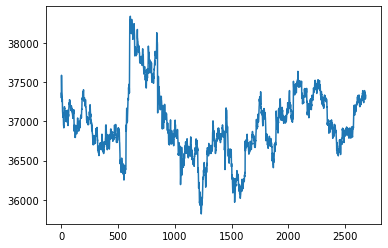

In [61]:
plt.plot(df.close[-10000:])